# Tasks 

Before sourcing the data, all the libraries and packages required to run the notbook are imported. 

In [6]:
# import scikit-learn
import sklearn as skl

# import numpy 
import numpy as np

# import matplotlib.pyplot 
import matplotlib.pyplot as plt

## Task 1: Source the Data Set 

Import the Iris data set from the sklearn.datasets module.

The load.iris() function is required to load the data to the dev environment. It does not restun the dataset: the command 'data' will allow view the dataset -- see task 2. 

In [7]:
# load the dataset from scikit-learn
data = skl.datasets.load_iris()

 ## Task 2: Explore the Data Structure

With the command 'data', you can view the full dataset, including the data and other metadata on the dataset.

In [8]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  


Based on the official documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), what 'data' returns is a 'bunch', which is a dictionnary-like object with the following elements. in my own words, these are:
- **features** bidimensional array listing the 4 features of each instance in the data set. Each value is a float. 

- **target** a monodimensional array (list) with the target of each instance, expressed in integers (0, 1, 2). 

- **frame** not really sure what this is, will come back to it.

- **target_names** the string (comprehensible) names associated with the target values -- i.e. the name of the flowers (setosa, versicolor, virginica). This is also a bidimensional array, composed of a list of strings (flower names), and a value describing the data type (string: Unicode characters, longest string is less than 10 characters). My reference: https://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html. 

- **description** aa short description of the data set, including number of instances, features, classes. 

- **feature_names** monodimensional array: a list including the strings representing the 4 feature names (sepal length and width, petal length and width). 

- **file_name** name of the .csv file 

- **data_module** basically the source, sklearn.datasets. 


## Task 3: Summarize the data

After loading the dataset, Numpy can be used to access the data and make calculations on the data and the features of the dataset. 

Before using numpy, the features are extracted from the dataset and stored in the variable *features*. 
The variable is a two-dimensional array. It contains multiple arrays, one for each target value in the dataset. Every array includes 4 values (one for each feature of the dataset), in this order: 
- sepal length 
- sepal width
- petal length
- petal width

In [9]:
# create variable for features
features = data.data 
#create variable for target (iris variety)
target = data.target

print(features)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Calculate mean, minumum, maximum, standard deviation, mean for all features in the dataset 

In this part, Numpy function are used to calculate the following values for each feature (column) in the dataset:
- mean: numpy.mean
- minimum: numpy.min
- maximum: numpy.max
- standard deviation: numpy.std
- median: numpy.median

The functions take in the array name and allow to include a axis parameter, which allows to specify along which axis the values are computed, in this case column-wise. If no axis is specified, the result is the mean of the flattened arrays. 

Sources: 

https://numpy.org/doc/stable/reference/generated/numpy.mean.html\
https://numpy.org/doc/stable/reference/generated/numpy.max.html\
https://numpy.org/doc/stable/reference/generated/numpy.max.html\
https://numpy.org/doc/stable/reference/generated/numpy.std.html\
https://numpy.org/doc/stable/reference/generated/numpy.median.html

In [10]:
# 
# mean 
print(f'Mean:\t\t\t{np.mean(features, axis=0)}')

# minimum
print(f'Minimum:\t\t{np.min(features, axis=0)}')

# maximum
print(f'Maximum:\t\t{np.max(features, axis=0)}')

# standard deviation
print(f'Standard Deviation:\t{np.std(features, axis=0)}')

# mean 
print(f'Median:\t\t\t{np.median(features, axis=0)}')


Mean:			[5.84333333 3.05733333 3.758      1.19933333]
Minimum:		[4.3 2.  1.  0.1]
Maximum:		[7.9 4.4 6.9 2.5]
Standard Deviation:	[0.82530129 0.43441097 1.75940407 0.75969263]
Median:			[5.8  3.   4.35 1.3 ]


**About the features**

- **mean**
- **minimum**
- **maximum**
- **standard deviation**. 

'The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean.'  Pritha Bhandari, How to Calculate Standard Deviation (Guide) | Calculator & Examples, https://www.scribbr.com/statistics/standard-deviation/#:~:text=The%20standard%20deviation%20is%20the,clustered%20close%20to%20the%20mean. 

In this case, petal length is the feature that varies the most across the datasets, with a standard deviation that is two to three times that of the other features. 

- **median** 

Median is defined as the middle term of the given set of data if the data is arranged either in ascending or descending order. Source: https://www.geeksforgeeks.org/median/. 

It differs from mean because it is not necessarily the average of a set of values, only the value that is exactly in the middle. 

In this case, the mean and the median of sepal length and width are similar, while those of petal length and petal width are significantly different. 

Petal length: mean = 3.758; median = 4.35
Petal width: mean = 1.19933333; median: 1.3

## Task 4

In this task, histograms are created for each feature in the Iris dataset. 

**Accessing each feature in the dataset**

In order to plot the histogram, each feature in the features array is accessed to generate monodimensional arrays, so that they can be named and plotted individually. 


In [25]:
# Sepal length 
sepal_length = features[:,0]
# Sepal width 
sepal_width = features[:,1]
# Petal lenght
petal_length = features[:,2]
# Petal width 
petal_width = features[:,3]

In [26]:
# Uncomment any of these to verify the arrays are correct, or check how they look like. 

#sepal_length
#sepal_width
#petal_length
#petal_width

**Plotting each feature**

Use matplotlib.pyplot to plot histograms for each feature. Each histogram has a title and diffent colors, to better differentiate them. 

Sources: 

matplotlib.pyplot.hist arguments https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 

name colors on matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html 
RGBA colors https://www.chai3d.org/download/doc/html/chapter14-colors.html 

<function matplotlib.pyplot.show(close=None, block=None)>

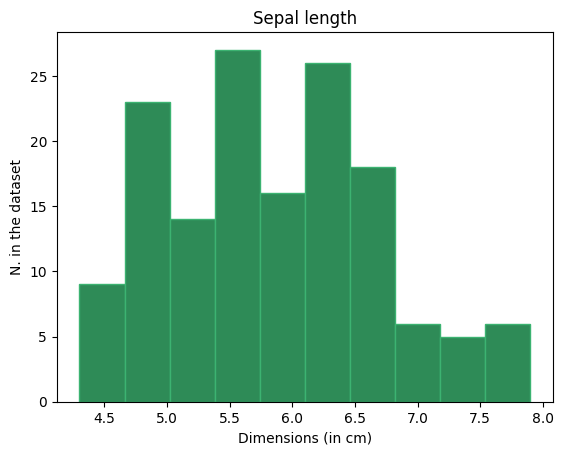

In [ ]:
# Sepal length
plt.hist(sepal_length, color = 'seagreen', edgecolor = 'mediumseagreen')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.title('Sepal length')
plt.show

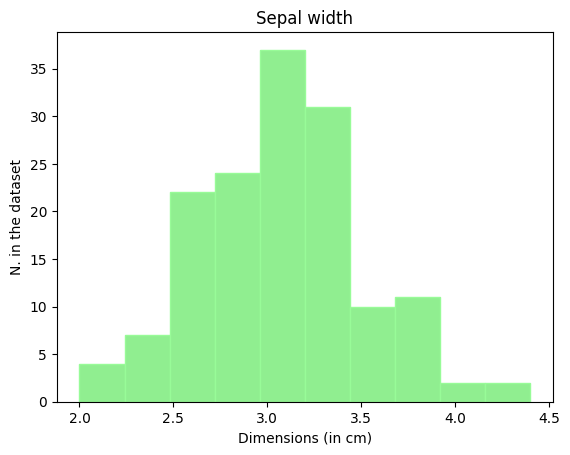

In [73]:
# Sepal width 
plt.hist(sepal_width, color = 'lightgreen', edgecolor = 'palegreen')
plt.title('Sepal width')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

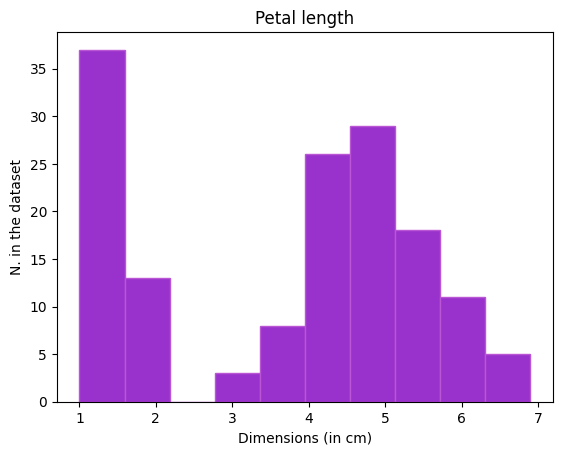

In [72]:
# Petal length
plt.hist(petal_length, color = 'darkorchid', edgecolor = 'mediumorchid')
plt.title('Petal length')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.show

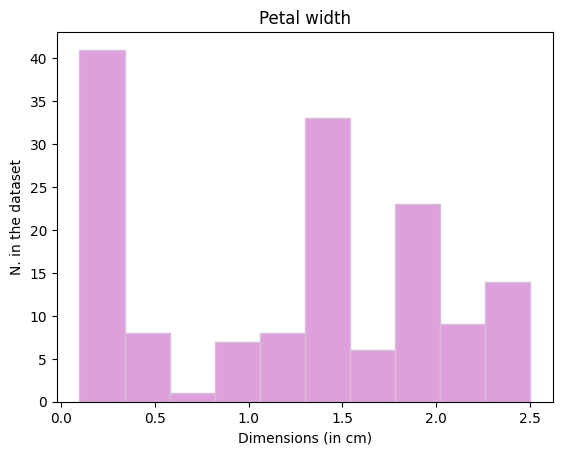

In [71]:
# Petal width 
plt.hist(petal_width, color = 'plum', edgecolor = 'thistle')
plt.title('Petal width')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.show()

**Plotting all the features together**

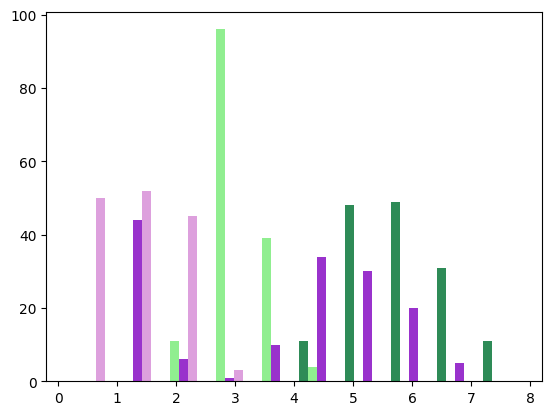

In [109]:
#set colors 
edgecolorss = ['#2E8B57','#90EE90','#9932CC','#DDA0DD']
colors = ['seagreen','lightgreen', 'darkorchid', 'plum']

# plot the histogram 
#plt.hist(features, histtype= 'step', stacked = False, label = 'Sepal length', edgecolor = edgecolorss)
plt.hist(features, stacked = False, label = 'Sepal length', color = colors)
#plt.hist(sepal_width, histtype='step', stacked=True, label = 'Sepal width')
plt.show()

My observations so far: 

- you can see how the standard deviation (how far the values are from the mean value) is much lower on sepal width than sepal length (0.43 vs 0.82), because the values of sepal width are much closer to the center of the histogram
- about petal length and width: I see both have groups of outliers with small dimensions, on the left end of the plot.
- the combined histogram is not telling much, whether stacked or not stacked, or with histtype = 'step'

## Task 5 

## End